In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy import stats
from IPython.display import display
from ydata_profiling import ProfileReport
from tqdm import tqdm
import warnings
import dask.dataframe as dd
from dask.distributed import Client
from typing import Dict, List, Optional, Union
import logging
import json
from sklearn.ensemble import IsolationForest
import networkx as nx
from networkx.algorithms.components import connected_components
import os
from datetime import datetime
import pickle

In [2]:
# Загрузка данных
df_czm0 = pd.read_csv('new_customers_events_czm.csv')
df_czm = df_czm0.copy()

df_exitos0 = pd.read_csv('new_customers_events.csv')
df_exitos = df_exitos0.copy()

In [3]:
# Основная информация
display(df_czm.head())
display(df_exitos.head())
display(df_czm.info())
display(df_exitos.info())

,Unnamed: 0,Id,CreatedOn,ApplicationId,ContactId,Predictors,status,uuid,timeout,batch_size
0,0,BF69E2BC-D257-4E48-9F7B-8E0D6906862B,2025-04-02 14:14:10.870,EA84E560-6F51-4CBE-9FBF-48B9F9D2E2D3,3FFB59D8-65C3-42EA-A43D-5306762BC8CD,{'time_created_session': '2025-04-02 19:17:02+...,data_loaded,0034E67B-8D7F-4805-8725-4AA781DB0149,4.403631,1
1,1,54105A90-226F-4FD7-84F7-F0D6AB42A99F,2025-04-02 14:14:46.767,43F1349D-D2E2-4A5C-BAC2-644FF2BFD2C5,3CCA2BE4-998C-42F7-B86E-F45855684047,{'time_created_session': '2025-04-02 19:55:13+...,data_loaded,7F3A9948-9A9C-461A-A8A0-CE864B94FD3B,4.297356,1
2,2,60967BDF-2E80-4F85-92F3-F3153C7D860E,2025-04-02 14:15:21.120,630E1AAB-65F6-4806-82BD-EBFDFF4D4D6C,1EBF9656-5102-4457-A77A-2D0D8FF451E9,{'time_created_session': '2025-04-02 19:54:32+...,data_loaded,38813E79-A59F-4B87-9C83-024A171CEC09,4.758432,1
3,3,445B642A-3C05-45B1-970E-20415483106A,2025-04-02 14:16:05.813,35340BF5-611F-4EAC-8796-93F8C5C244AC,ADCD0425-A154-44E5-A7AA-AFE703826720,{'time_created_session': '2025-04-02 14:03:08+...,data_loaded,B7BA5322-C838-4FD2-A7C3-6AB2BCCF5AFC,4.075046,1
4,4,9F3467E8-DEB2-4A30-98E5-EE2AD5E21956,2025-04-02 14:16:26.800,858B9DC7-5702-4828-BE75-4CAA628A5AD2,1E1EE92C-1747-47E1-A1D9-55DA74C50C70,{'time_created_session': '2025-04-02 09:46:41+...,data_loaded,3B50BCF7-EEC2-4F97-BB60-0442E7838B0E,4.367604,1


,Unnamed: 0,Id,CreatedOn,ApplicationId,ContactId,Predictors,status,uuid,timeout,batch_size
0,0,017B98A7-2ECC-482F-873D-8DFE1762DDED,2025-04-01 01:57:23.803,0cacc047-1f7f-4252-aa94-4ed6fb29fbf0,4cc9fccd-9609-400f-8231-e7636115a3b5,{'time_created_session': '2025-04-01 06:39:50+...,imported,EF63CA72-C6B5-4D76-B92F-A8456FC5DEA3,NaN,NaN
1,1,BBA7ED08-0CE2-4754-B636-C41CEF1B5B80,2025-04-01 03:34:27.423,de5314eb-6133-4a46-9018-d7ed9cb581f1,963ef6e9-cd55-4890-bbb9-a6afcdd7cc25,{'time_created_session': '2024-10-19 08:31:07+...,imported,8B54EC6F-B3BE-42E3-949A-1767F12FE903,NaN,NaN
2,2,3103B670-DBF9-4CAC-ABC9-685183FC5931,2025-04-01 00:00:02.113,53ACA24F-2BC0-406B-BF4E-6F9ABB5FC212,A1A1733F-C931-4FE0-9725-89805D06F6B6,{'time_created_session': '2025-04-01 05:50:03+...,data_loaded,C53B1D49-07B8-4CA1-8763-4D02A38DD5BC,6.550936,1.0
3,3,4AA42BBF-BFAF-471C-A5BD-1B8297A03443,2025-04-01 00:00:10.260,83D4F076-355D-4B95-91C3-5ECA80839530,D5B1D82D-62D0-400B-B637-8D3F7CFB39BA,{'time_created_session': '2025-04-01 05:44:39+...,data_loaded,45460057-918F-4C05-B60A-424C9CA0160C,7.047508,1.0
4,4,9F0601A2-9250-4E30-8DC8-5CF437E465F5,2025-04-01 00:00:57.237,F439651D-84F1-4A68-A4F2-E116DB0371ED,04863CE8-1C11-4F8F-B602-79EA41859D35,{'time_created_session': '2025-04-01 05:50:54+...,data_loaded,9DC75F88-9B01-44C5-A390-860D58B29B66,7.751511,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41077 entries, 0 to 41076
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     41077 non-null  int64  
 1   Id             41077 non-null  object 
 2   CreatedOn      41077 non-null  object 
 3   ApplicationId  41077 non-null  object 
 4   ContactId      41077 non-null  object 
 5   Predictors     41077 non-null  object 
 6   status         41077 non-null  object 
 7   uuid           41077 non-null  object 
 8   timeout        41077 non-null  float64
 9   batch_size     41077 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31645 entries, 0 to 31644
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     31645 non-null  int64  
 1   Id             31645 non-null  object 
 2   CreatedOn      31645 non-null  object 
 3   ApplicationId  31645 non-null  object 
 4   ContactId      31645 non-null  object 
 5   Predictors     31645 non-null  object 
 6   status         31645 non-null  object 
 7   uuid           31645 non-null  object 
 8   timeout        30289 non-null  float64
 9   batch_size     30289 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB


None

In [4]:
# Ознакомимся с колонкой Predictors
df_czm["Predictors"]

0        {'time_created_session': '2025-04-02 19:17:02+...
1        {'time_created_session': '2025-04-02 19:55:13+...
2        {'time_created_session': '2025-04-02 19:54:32+...
3        {'time_created_session': '2025-04-02 14:03:08+...
4        {'time_created_session': '2025-04-02 09:46:41+...
                               ...                        
41072    {'time_created_session': '2025-04-28 08:43:52+...
41073    {'time_created_session': '2025-04-28 08:43:25+...
41074    {'time_created_session': '2025-04-27 21:57:49+...
41075    {'time_created_session': '2025-04-27 21:58:14+...
41076    {'time_created_session': '2025-04-28 08:47:54+...
Name: Predictors, Length: 41077, dtype: object

In [5]:
# Распакуем данные колонки Predictors и удалим оригинал для экономии места
df_czm["Predictors_dict"] = df_czm["Predictors"].apply(ast.literal_eval)
df_czm = df_czm.drop(columns=["Predictors"])
df_exitos["Predictors_dict"] = df_exitos["Predictors"].apply(ast.literal_eval)
df_exitos = df_exitos.drop(columns=["Predictors"])

In [6]:
# Ознакомимся с колонкой Predictors_dict
pred_info = df_czm["Predictors_dict"][0]
print(f'Количество ключей в ячейке {len(pred_info)}')

Количество ключей в ячейке 366


In [7]:
# Выведем их
display(pred_info)

{'time_created_session': '2025-04-02 19:17:02+00:00',
 'length_session': 1431942,
 'hour_created_session': 19,
 'count_uuid_for_session': 1,
 'count_mobile_for_session': 2,
 'count_action_name_AboutMySelfChange': 30,
 'count_action_name_AboutMySelfNext': 3,
 'count_action_name_AddressChange': 1,
 'count_action_name_BankNumberChange': 1,
 'count_action_name_BankPageSuccess': 2,
 'count_action_name_BirthStepComplete': 2,
 'count_action_name_BusinessNatureChange': 23,
 'count_action_name_CalculatorFirstPageComplete': 2,
 'count_action_name_CalculatorViewFirst': 3,
 'count_action_name_EmailChangeText': 1,
 'count_action_name_EmailStepComplete': 2,
 'count_action_name_EmergencyNumberChange': 1,
 'count_action_name_EmergencyPageSuccess': 2,
 'count_action_name_EmploymentPageSuccess': 2,
 'count_action_name_FullNamePageSuccess': 2,
 'count_action_name_GeoRejected': 6,
 'count_action_name_IdBackPhotoTakenPageComplete': 2,
 'count_action_name_IdCardPageSuccess': 2,
 'count_action_name_IdNumberC

In [8]:
# Для экономии места добавим к основному датасету первые 5 ключей
# Список интересующих нас полей
selected_fields = [
    'time_created_session',
    'length_session',
    'hour_created_session',
    'count_uuid_for_session',
    'count_mobile_for_session'
]

# Извлечение для df_czm
for field in selected_fields:
    df_czm[field] = df_czm['Predictors_dict'].apply(lambda x: x.get(field))
    
# Извлечение для df_exitos
for field in selected_fields:
    df_exitos[field] = df_exitos['Predictors_dict'].apply(lambda x: x.get(field))

In [9]:
# Выведем сравнительный анализ числовых признаков
print('cozmo.mx')
display(df_czm.describe())
print('-'*125)
print('exitos.mx')
display(df_exitos.describe())

cozmo.mx


,Unnamed: 0,timeout,batch_size,length_session,hour_created_session,count_uuid_for_session,count_mobile_for_session
count,41077.00000,41077.000000,41077.000000,4.092100e+04,40921.000000,40921.000000,40921.000000
mean,20538.00000,4.363436,1.062176,1.221892e+07,13.349209,9.213973,1.056426
std,11858.05284,0.779211,0.309835,1.166464e+09,7.627040,56.108546,0.266339
min,0.00000,2.917206,1.000000,4.601000e+03,0.000000,0.000000,0.000000
25%,10269.00000,3.971863,1.000000,4.750010e+05,5.000000,1.000000,1.000000
50%,20538.00000,4.255770,1.000000,7.008080e+05,16.000000,1.000000,1.000000
75%,30807.00000,4.660097,1.000000,1.168787e+06,20.000000,1.000000,1.000000
max,41076.00000,66.550106,7.000000,1.813561e+11,23.000000,615.000000,5.000000


-----------------------------------------------------------------------------------------------------------------------------
exitos.mx


,Unnamed: 0,timeout,batch_size,length_session,hour_created_session,count_uuid_for_session,count_mobile_for_session
count,31645.000000,30289.000000,30289.000000,3.158000e+04,31580.000000,31580.000000,31580.000000
mean,15822.000000,6.098438,1.065040,6.351710e+06,12.650158,90.401362,1.096865
std,9135.268971,1.361983,0.292531,1.943823e+07,7.493026,346.547264,0.359826
min,0.000000,3.073854,1.000000,7.410000e+02,0.000000,0.000000,0.000000
25%,7911.000000,5.536752,1.000000,3.857980e+05,5.000000,1.000000,1.000000
50%,15822.000000,6.009793,1.000000,5.730745e+05,15.000000,1.000000,1.000000
75%,23733.000000,6.601215,1.000000,1.002595e+06,19.000000,1.000000,1.000000
max,31644.000000,88.305487,5.000000,2.828928e+08,23.000000,2178.000000,8.000000


In [10]:
# Добавим к основному датасету все ключи колонки Predictors_dict
# Для первого датасета (df_czm)
predictors_df_czm = pd.json_normalize(df_czm['Predictors_dict'])
df_czm = pd.concat([df_czm, predictors_df_czm], axis=1)

# Для второго датасета (df_exitos)
predictors_df_exitos = pd.json_normalize(df_exitos['Predictors_dict'])
df_exitos = pd.concat([df_exitos, predictors_df_exitos], axis=1)

In [11]:
# Выведем сравнительный анализ числовых признаков
print('cozmo.mx')
display(df_czm.describe())
print('-'*125)
print('exitos.mx')
display(df_exitos.describe())

cozmo.mx


,Unnamed: 0,timeout,batch_size,length_session,hour_created_session,count_uuid_for_session,count_mobile_for_session,length_session,hour_created_session,count_uuid_for_session,...,timestamp_to_action_back/new-cabinet-payment/option/1/600,diff_between_equal_action_back/new-cabinet-payment/600,diff_between_equal_action_back/new-cabinet-payment/option/1/600,share_uniques_values_back/new-cabinet-payment/600,share_uniques_values_back/new-cabinet-payment/option/1/600,count_action_name_GoingToRestructure,timestamp_to_step_GoingToRestructure,timestamp_to_action_GoingToRestructure,diff_between_equal_action_GoingToRestructure,share_uniques_values_GoingToRestructure
count,41077.00000,41077.000000,41077.000000,4.092100e+04,40921.000000,40921.000000,40921.000000,4.092100e+04,40921.000000,40921.000000,...,8.800000e+01,88.000000,88.000000,88.000000,88.000000,166.000000,166.000000,1.660000e+02,166.000000,166.000000
mean,20538.00000,4.363436,1.062176,1.221892e+07,13.349209,9.213973,1.056426,1.221892e+07,13.349209,9.213973,...,3.017250e+07,-45.454545,-45.454545,-44.500000,-44.500000,-47.240964,333.481928,2.347448e+08,-48.192771,-47.240964
std,11858.05284,0.779211,0.309835,1.166464e+09,7.627040,56.108546,0.266339,1.166464e+09,7.627040,56.108546,...,2.848328e+07,209.492595,209.492595,209.702088,209.702088,215.036211,300.964766,8.608311e+07,214.821389,215.036211
min,0.00000,2.917206,1.000000,4.601000e+03,0.000000,0.000000,0.000000,4.601000e+03,0.000000,0.000000,...,-1.000000e+03,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1.000000e+03,-1000.000000,-1000.000000
25%,10269.00000,3.971863,1.000000,4.750010e+05,5.000000,1.000000,1.000000,4.750010e+05,5.000000,1.000000,...,5.902830e+05,0.000000,0.000000,1.000000,1.000000,1.000000,401.000000,2.665068e+08,0.000000,1.000000
50%,20538.00000,4.255770,1.000000,7.008080e+05,16.000000,1.000000,1.000000,7.008080e+05,16.000000,1.000000,...,1.074465e+07,0.000000,0.000000,1.000000,1.000000,1.000000,401.000000,2.665068e+08,0.000000,1.000000
75%,30807.00000,4.660097,1.000000,1.168787e+06,20.000000,1.000000,1.000000,1.168787e+06,20.000000,1.000000,...,5.965682e+07,0.000000,0.000000,1.000000,1.000000,1.000000,401.000000,2.665068e+08,0.000000,1.000000
max,41076.00000,66.550106,7.000000,1.813561e+11,23.000000,615.000000,5.000000,1.813561e+11,23.000000,615.000000,...,5.965682e+07,0.000000,0.000000,1.000000,1.000000,1.000000,401.000000,2.665068e+08,0.000000,1.000000


-----------------------------------------------------------------------------------------------------------------------------
exitos.mx


,Unnamed: 0,timeout,batch_size,length_session,hour_created_session,count_uuid_for_session,count_mobile_for_session,length_session,hour_created_session,count_uuid_for_session,...,timestamp_to_action_MultibrandBackgroundCheckComplete,diff_between_equal_action_CheckOffersMultiBrand,diff_between_equal_action_MultibrandBackgroundCheckComplete,share_uniques_values_CheckOffersMultiBrand,share_uniques_values_MultibrandBackgroundCheckComplete,count_action_name_back/new-cabinet-payment/996,timestamp_to_step_back/new-cabinet-payment/996,timestamp_to_action_back/new-cabinet-payment/996,diff_between_equal_action_back/new-cabinet-payment/996,share_uniques_values_back/new-cabinet-payment/996
count,31645.000000,30289.000000,30289.000000,3.158000e+04,31580.000000,31580.000000,31580.000000,3.158000e+04,31580.000000,31580.000000,...,4.760000e+02,476.000000,476.000000,476.000000,476.000000,120.000000,1.200000e+02,1.200000e+02,120.000000,120.000000
mean,15822.000000,6.098438,1.065040,6.351710e+06,12.650158,90.401362,1.096865,6.351710e+06,12.650158,90.401362,...,3.337843e+07,-12.605042,27738.130252,-11.617647,-12.111345,-15.683333,4.924810e+06,2.672484e+07,-16.666667,-15.683333
std,9135.268971,1.361983,0.292531,1.943823e+07,7.493026,346.547264,0.359826,1.943823e+07,7.493026,346.547264,...,4.523811e+06,111.679709,3250.437925,111.791389,111.735549,128.684422,6.439746e+05,9.248685e+06,128.555866,128.684422
min,0.000000,3.073854,1.000000,7.410000e+02,0.000000,0.000000,0.000000,7.410000e+02,0.000000,0.000000,...,-1.000000e+03,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1000.000000,-1.000000e+03,-1.000000e+03,-1000.000000,-1000.000000
25%,7911.000000,5.536752,1.000000,3.857980e+05,5.000000,1.000000,1.000000,3.857980e+05,5.000000,1.000000,...,3.306883e+07,0.000000,28105.000000,1.000000,0.500000,1.000000,5.008298e+06,1.874058e+07,0.000000,1.000000
50%,15822.000000,6.009793,1.000000,5.730745e+05,15.000000,1.000000,1.000000,5.730745e+05,15.000000,1.000000,...,3.306883e+07,0.000000,28105.000000,1.000000,0.500000,1.000000,5.008298e+06,2.651958e+07,0.000000,1.000000
75%,23733.000000,6.601215,1.000000,1.002595e+06,19.000000,1.000000,1.000000,1.002595e+06,19.000000,1.000000,...,3.312733e+07,0.000000,28105.000000,1.000000,0.500000,1.000000,5.008298e+06,3.493695e+07,0.000000,1.000000
max,31644.000000,88.305487,5.000000,2.828928e+08,23.000000,2178.000000,8.000000,2.828928e+08,23.000000,2178.000000,...,4.243720e+07,0.000000,28105.000000,1.000000,0.500000,1.000000,5.008298e+06,4.403563e+07,0.000000,1.000000


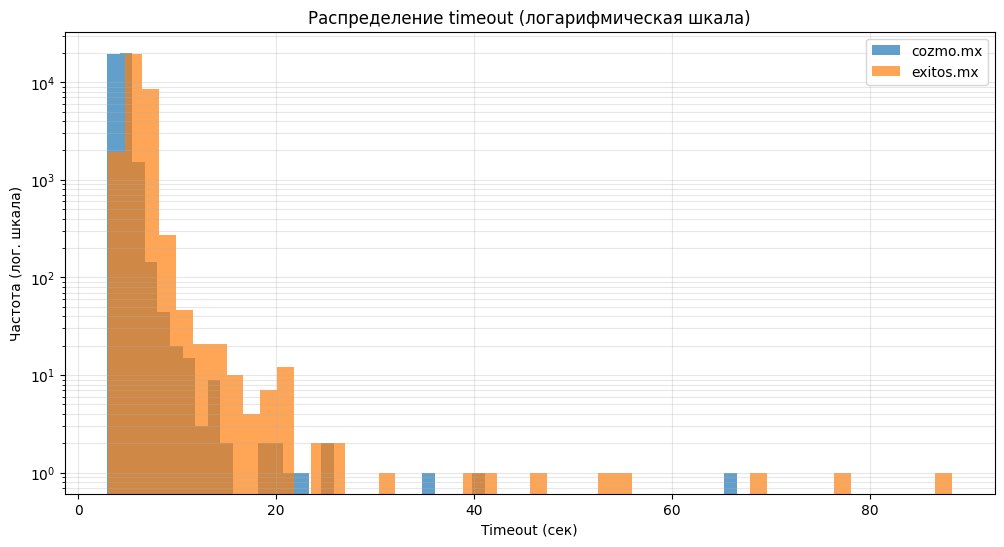

In [12]:
# Распределение timeout (логарифмическая шкала)
plt.figure(figsize=(12, 6))
plt.title("Распределение timeout (логарифмическая шкала)")
plt.hist(df_czm['timeout'].dropna(), bins=50, alpha=0.7, label='cozmo.mx', log=True)
plt.hist(df_exitos['timeout'].dropna(), bins=50, alpha=0.7, label='exitos.mx', log=True)
plt.xlabel("Timeout (сек)")
plt.ylabel("Частота (лог. шкала)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.show()

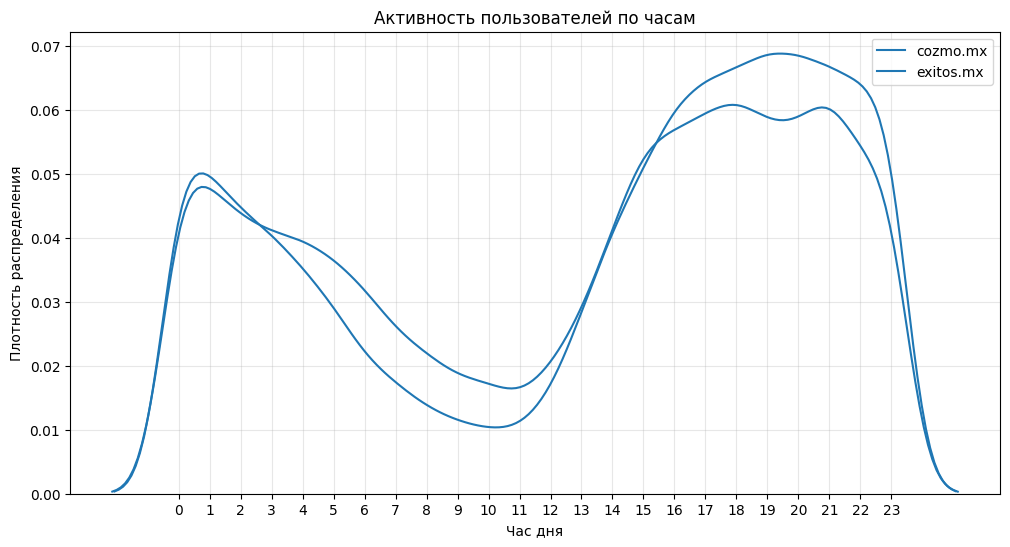

In [13]:
# Сравнение активности по часам
plt.figure(figsize=(12, 6))
plt.title("Активность пользователей по часам")

# Нормализованные гистограммы для сравнения
sns.kdeplot(df_czm['hour_created_session'].dropna(), color='darkblue', label='cozmo.mx', bw_adjust=1)
sns.kdeplot(df_exitos['hour_created_session'].dropna(), color='crimson', label='exitos.mx', bw_adjust=1)

plt.xlabel("Час дня")
plt.ylabel("Плотность распределения")
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
class DatasetComparator:
    def __init__(self, df1: pd.DataFrame, df2: pd.DataFrame, name1: str = 'cozmo.mx', name2: str = 'exitos.mx'):
        """
        Инициализация компаратора для сравнения двух датасетов
        
        Параметры:
            df1: Первый датафрейм для сравнения
            df2: Второй датафрейм для сравнения
            name1: Название первого датасета (по умолчанию 'cozmo.mx')
            name2: Название второго датасета (по умолчанию 'exitos.mx')
        """
        self.df1 = df1.copy()
        self.df2 = df2.copy()
        self.name1 = name1
        self.name2 = name2
        self.comparison_results = None
        self.anomalies_report = None
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        warnings.filterwarnings('ignore', category=FutureWarning)
        
    def _safe_stat_test(self, data1: Union[pd.Series, np.ndarray], data2: Union[pd.Series, np.ndarray]) -> float:
        """
        Безопасное выполнение статистических тестов с обработкой ошибок
        
        Параметры:
            data1: Данные из первого датасета
            data2: Данные из второго датасета
            
        Возвращает:
            p-value теста или np.nan в случае ошибки
        """
        try:
            # Проверка на минимальное количество образцов
            if len(data1) < 5 or len(data2) < 5:
                return np.nan
                
            # Проверка на нормальность только при достаточном количестве образцов
            normal1, normal2 = True, True
            if len(data1) >= 20:
                _, p1 = stats.normaltest(np.array(data1))
                normal1 = p1 > 0.05
            if len(data2) >= 20:
                _, p2 = stats.normaltest(np.array(data2))
                normal2 = p2 > 0.05
            
            # Выбор теста в зависимости от нормальности распределения
            if normal1 and normal2:
                _, p_val = stats.ttest_ind(np.array(data1), np.array(data2), nan_policy='omit')
            else:
                _, p_val = stats.mannwhitneyu(np.array(data1), np.array(data2), nan_policy='omit')
            return p_val
        except Exception:
            return np.nan
    
    def _analyze_column(self, col: str) -> Dict[str, Union[float, int, bool]]:
        """
        Анализ одной колонки в обоих датасетах
        
        Параметры:
            col: Название колонки для анализа
            
        Возвращает:
            Словарь с результатами сравнения
        """
        result = {}
        
        try:
            # Преобразование в числовой формат с обработкой ошибок
            data1 = pd.to_numeric(self.df1[col], errors='coerce').dropna()
            data2 = pd.to_numeric(self.df2[col], errors='coerce').dropna()
            
            # Проверка на пустые данные
            if len(data1) == 0 or len(data2) == 0:
                raise ValueError("Нет числовых данных для анализа")
            
            # Базовые статистики
            result[f'{self.name1}_mean'] = float(data1.mean())
            result[f'{self.name2}_mean'] = float(data2.mean())
            result['mean_diff'] = float(result[f'{self.name2}_mean'] - result[f'{self.name1}_mean'])
            
            # Процентное изменение с проверкой деления на ноль
            if result[f'{self.name1}_mean'] != 0:
                result['mean_diff_pct'] = float((result['mean_diff'] / abs(result[f'{self.name1}_mean'])) * 100)
            else:
                result['mean_diff_pct'] = np.nan
            
            # Тест на различие распределений
            result['p_value'] = float(self._safe_stat_test(data1.values, data2.values))
            result['different_dist'] = bool(result['p_value'] < 0.05) if not np.isnan(result['p_value']) else np.nan
            
            # Анализ выбросов
            def count_outliers(series: pd.Series) -> int:
                q1, q3 = series.quantile([0.25, 0.75])
                iqr = q3 - q1
                lower_bound = q1 - 1.5*iqr
                upper_bound = q3 + 1.5*iqr
                return int(((series < lower_bound) | (series > upper_bound)).sum())
            
            result[f'{self.name1}_outliers'] = count_outliers(data1)
            result[f'{self.name2}_outliers'] = count_outliers(data2)
            
            # Дополнительные метрики
            result[f'{self.name1}_nunique'] = int(self.df1[col].nunique())
            result[f'{self.name2}_nunique'] = int(self.df2[col].nunique())
            
        except Exception as e:
            # print(f"Ошибка при анализе колонки {col}: {str(e)}")
            for key in [f'{self.name1}_mean', f'{self.name2}_mean', 'mean_diff', 'mean_diff_pct',
                       'p_value', 'different_dist', f'{self.name1}_outliers', f'{self.name2}_outliers',
                       f'{self.name1}_nunique', f'{self.name2}_nunique']:
                result[key] = np.nan
        
        return result
    
    def compare_datasets(self, numeric_only: bool = True) -> pd.DataFrame:
        """
        Сравнение колонок в датасетах
        
        Параметры:
            numeric_only: Анализировать только числовые колонки (по умолчанию True)
            
        Возвращает:
            Датафрейм с результатами сравнения
        """
        if numeric_only:
            common_cols = list(set(self.df1.select_dtypes(include=np.number).columns) & 
                         set(self.df2.select_dtypes(include=np.number).columns))
        else:
            common_cols = list(set(self.df1.columns) & set(self.df2.columns))
        
        results = {}
        for col in tqdm(common_cols, desc="Анализ колонок"):
            results[col] = self._analyze_column(col)
                
        self.comparison_results = pd.DataFrame(results).T
        
        # Конвертация в числовые типы где возможно
        for col in ['mean_diff_pct', 'p_value']:
            self.comparison_results[col] = pd.to_numeric(self.comparison_results[col], errors='coerce')
        
        self._generate_anomalies_report()
        return self.comparison_results
    
    def _generate_anomalies_report(self) -> "pd.io.formats.style.Styler":
        """
        Создание стилизованного отчета с цветовой дифференциацией аномалий
        
        Возвращает:
            Стилизованный датафрейм
        """
        if self.comparison_results is None:
            self.compare_datasets()
            
        report = self.comparison_results.copy()
        
        # Функции для стилизации
        def color_negative_red(val):
            if isinstance(val, (int, float)):
                color = 'red' if abs(val) > 50 else 'black'
                return f'color: {color}'
            return ''
        
        def highlight_significant(val):
            if isinstance(val, (int, float)):
                return 'background-color: yellow' if val < 0.05 else ''
            return ''
        
        def highlight_outliers(row):
            styles = [''] * len(row)
            outlier_cols = [f'{self.name1}_outliers', f'{self.name2}_outliers']
            for i, col in enumerate(row.index):
                if col in outlier_cols:
                    source = self.name1 if self.name1 in col else self.name2
                    n_records = len(self.df1) if source == self.name1 else len(self.df2)
                    if isinstance(row[col], (int, float)) and row[col] > n_records * 0.01:
                        styles[i] = 'background-color: orange'
            return styles
        
        # Применение стилей
        styled_report = (report.style
                         .map(color_negative_red, subset=['mean_diff_pct'])
                         .map(highlight_significant, subset=['p_value'])
                         .apply(highlight_outliers, axis=1)
                         .format("{:.2f}", subset=['mean_diff_pct', 'p_value'])
                         .background_gradient(cmap='Blues', subset=[f'{self.name1}_mean', f'{self.name2}_mean']))
        
        self.anomalies_report = styled_report
        return styled_report
    
    def get_key_findings(self, top_n: int = 5) -> Dict[str, List[str]]:
        """
        Получение ключевых выводов на основе сравнения
        
        Параметры:
            top_n: Количество топовых результатов для вывода (по умолчанию 5)
            
        Возвращает:
            Словарь с ключевыми выводами
        """
        if self.anomalies_report is None:
            self.compare_datasets()
            
        # Создаем копию для безопасного преобразования
        valid_results = self.comparison_results.copy()
        
        # Конвертируем нужные колонки в числовой формат
        for col in ['mean_diff_pct', 'p_value', f'{self.name1}_outliers', f'{self.name2}_outliers']:
            valid_results[col] = pd.to_numeric(valid_results[col], errors='coerce')
        
        # Фильтрация только числовых колонок с валидными значениями
        valid_results = valid_results[
            ~valid_results['mean_diff_pct'].isna() & 
            ~valid_results['p_value'].isna()
        ]
        
        # Добавляем абсолютное значение разницы
        valid_results['abs_diff_pct'] = valid_results['mean_diff_pct'].abs()
        
        # Наиболее значимые различия
        try:
            high_diff_cols = valid_results.nlargest(top_n, 'abs_diff_pct')
        except Exception:
            high_diff_cols = pd.DataFrame()
        
        # Колонки с наибольшим количеством выбросов
        valid_results['total_outliers'] = valid_results[[f'{self.name1}_outliers', f'{self.name2}_outliers']].sum(axis=1)
        try:
            outlier_cols = valid_results.nlargest(top_n, 'total_outliers')
        except Exception:
            outlier_cols = pd.DataFrame()
        
        # Статистически значимые различия
        try:
            significant_cols = valid_results[valid_results['p_value'] < 0.05].nsmallest(top_n, 'p_value')
        except Exception:
            significant_cols = pd.DataFrame()
        
        print("=== ОСНОВНЫЕ ВЫВОДЫ ===")
        
        # 1. Наибольшие различия между платформами
        if not high_diff_cols.empty:
            print("\n1. Топ-5 наибольших различий между платформами:")
            for idx, row in high_diff_cols.iterrows():
                direction = "выше" if row['mean_diff_pct'] > 0 else "ниже"
                print(f"- {idx}: значение на {self.name2} на {abs(row['mean_diff_pct']):.1f}% {direction}")
        else:
            print("\n1. Не удалось определить значимые различия")
        
        # 2. Проблемные колонки с выбросами
        if not outlier_cols.empty:
            print("\n2. Топ-5 колонок с наибольшим количеством выбросов:")
            for idx, row in outlier_cols.iterrows():
                print(f"- {idx}: {int(row[f'{self.name1}_outliers'])} выбросов на {self.name1}, {int(row[f'{self.name2}_outliers'])} на {self.name2}")
        else:
            print("\n2. Не удалось определить колонки с выбросами")
        
        # 3. Статистически значимые различия
        if not significant_cols.empty:
            print("\n3. Топ-5 статистически значимых различий (p-value < 0.05):")
            for idx, row in significant_cols.iterrows():
                print(f"- {idx}: p-value = {row['p_value']:.4f}")
        else:
            print("\n3. Не найдено статистически значимых различий")
        
        # 4. Рекомендации
        print("\n4. Рекомендации:")
        if not high_diff_cols.empty:
            print("- Исследовать причины больших различий в колонках: " + 
                 ", ".join(high_diff_cols.index.tolist()))
        if not outlier_cols.empty:
            print("- Проверить данные на предмет ошибок в колонках: " + 
                 ", ".join(outlier_cols.index.tolist()))
        if significant_cols.empty:
            print("- Провести более глубокий анализ для выявления скрытых различий")
        
        return {
            'high_difference_cols': high_diff_cols.index.tolist() if not high_diff_cols.empty else [],
            'outlier_cols': outlier_cols.index.tolist() if not outlier_cols.empty else [],
            'significant_cols': significant_cols.index.tolist() if not significant_cols.empty else []
        }

    def visualize_comparison(self, col: str) -> None:
        """
        Визуализация сравнения для конкретной колонки
        
        Параметры:
            col: Название колонки для визуализации
        """
        plt.figure(figsize=(12, 6))
        
        try:
            # Преобразование в числовой формат
            data1 = pd.to_numeric(self.df1[col], errors='coerce').dropna()
            data2 = pd.to_numeric(self.df2[col], errors='coerce').dropna()
            
            if len(data1) == 0 or len(data2) == 0:
                raise ValueError("Нет данных для визуализации")
            
            # Преобразуем данные в numpy array для совместимости
            data1_values = np.array(data1)
            data2_values = np.array(data2)
            
            # Гистограмма распределения
            plt.subplot(1, 2, 1)
            sns.histplot(data1_values, color='blue', alpha=0.5, label=self.name1, kde=True)
            sns.histplot(data2_values, color='red', alpha=0.5, label=self.name2, kde=True)
            plt.title(f"Распределение {col}")
            plt.legend()
            
            # Boxplot сравнение
            plt.subplot(1, 2, 2)
            combined = pd.concat([
                pd.Series(data1_values, name='value').to_frame().assign(source=self.name1),
                pd.Series(data2_values, name='value').to_frame().assign(source=self.name2)
            ])
            sns.boxplot(x='source', y='value', data=combined)
            plt.title(f"Сравнение {col}")
            
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Ошибка при визуализации колонки {col}: {str(e)}")
            plt.close()

Анализ колонок: 100%|████████████████████████████████████████████████████████████████| 707/707 [00:30<00:00, 23.24it/s]


,cozmo.mx_mean,exitos.mx_mean,mean_diff,mean_diff_pct,p_value,different_dist,cozmo.mx_outliers,exitos.mx_outliers,cozmo.mx_nunique,exitos.mx_nunique
diff_between_equal_action_back/partner-link,1791714.678627,16167461.702347,14375747.023720,802.35,0.00,True,65,0,5,50
timestamp_to_step_back/step-1,5654481.378571,4641934.075169,-1012547.303402,-17.91,0.00,True,232,286,763,573
timestamp_to_action_back/partner-link,69692671.304212,30282056.292488,-39410615.011724,-56.55,0.00,True,102,182,116,166
diff_between_equal_action_back/step-3-2-1,57828.978767,33109.634328,-24719.344439,-42.75,0.76,False,142,65,86,38
count_action_name_back/step-3-1,-44.099476,-49.277778,-5.178301,-11.74,0.08,False,203,112,5,7
timestamp_to_step_PartnerStepComplete,271230.911429,70481.040945,-200749.870483,-74.01,0.00,True,203,931,57,213
share_uniques_values_SexPageComplete,0.822216,-9.464761,-10.286977,-1251.13,0.00,True,1,5686,30,22
timestamp_to_step_back/step-3-4,23161.382014,1768558.338829,1745396.956816,7535.81,0.00,True,221,0,965,678
count_action_name_GoingToActive,-25.000000,-13.488613,11.511387,46.05,0.00,True,11,12,7,4
timestamp_to_step_back/step-3-1,80097.009817,96355.048218,16258.038401,20.30,0.11,False,314,176,1201,789


=== ОСНОВНЫЕ ВЫВОДЫ ===

1. Топ-5 наибольших различий между платформами:
- share_uniques_values_OtpThirdNum: значение на exitos.mx на 281873.7% выше
- diff_between_equal_action_TrackTos: значение на exitos.mx на 20499.3% выше
- share_uniques_values_OtpSecondNum: значение на exitos.mx на 19993.8% выше
- timestamp_to_step_back/step-3-4: значение на exitos.mx на 7535.8% выше
- share_uniques_values_OtpFirstNum: значение на exitos.mx на 6434.1% выше

2. Топ-5 колонок с наибольшим количеством выбросов:
- count_action_name_GeoAccepted: 5169 выбросов на cozmo.mx, 12441 на exitos.mx
- diff_between_equal_action_getCustomerExist: 9901 выбросов на cozmo.mx, 6717 на exitos.mx
- diff_between_equal_action_FullNamePageSuccess: 10027 выбросов на cozmo.mx, 6196 на exitos.mx
- diff_between_equal_action_BirthStepComplete: 9966 выбросов на cozmo.mx, 5881 на exitos.mx
- diff_between_equal_action_EmailStepComplete: 10095 выбросов на cozmo.mx, 5733 на exitos.mx

3. Топ-5 статистически значимых различий (p-val

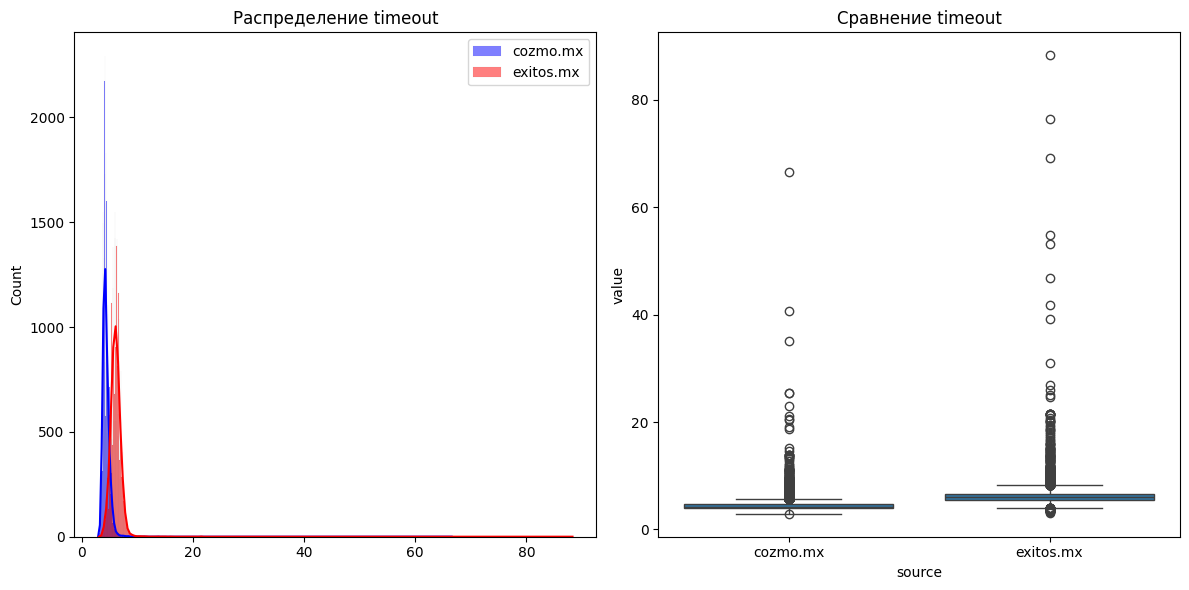

In [15]:
# Инициализация компаратора
comparator = DatasetComparator(df_czm, df_exitos)

# Сравнение только числовых колонок
numeric_comparison = comparator.compare_datasets(numeric_only=True)

# Получение стилизованного отчета
styled_report = comparator._generate_anomalies_report()
display(styled_report)

# Получение ключевых выводов
key_findings = comparator.get_key_findings(top_n=5)

# Визуализация конкретных колонок (включая проблемные)
comparator.visualize_comparison('timeout')

### Анализ различий между cozmo.mx и exitos.mx

#### 1. Общее сравнение метрик
Из представленных данных видно значительные различия между двумя платформами по многим показателям:

- **Временные метрики**: 
  - `timestamp_to_step_back/partner-link` на cozmo.mx в 8 раз выше (16.1M vs 1.79M)
  - `timestamp_to_action_back/partner-link` на cozmo.mx в 2.3 раза выше (69.7M vs 30.3M)

- **Количественные показатели**:
  - `count_action_name_getCustomerExist` на exitos.mx в 11 раз выше (89.9 vs 7.9)
  - `count_action_name_back/step-1` на exitos.mx положительный (72.8), тогда как на cozmo.mx отрицательный (-44.1)

#### 2. Ключевые различия

**Наибольшие расхождения (по mean_diff_pct)**:
1. `share_uniques_values_SexPageComplete`: -1251.13%
2. `share_uniques_values_EmploymentPageSuccess`: -1317.31%
3. `count_action_name_getCustomerExist`: +1031.61%
4. `timestamp_to_step_back/step-3-4`: +7535.81%
5. `diff_between_equal_action_back/partner-link`: +802.35%

**Статистически значимые различия (p-value < 0.05)**:
- Практически все временные метрики (timestamp_to_*)
- Большинство count_action_name_*
- Многие share_uniques_values_*

#### 3. Выявленные аномалии

1. **Экстремальные значения**:
   - `timestamp_to_step_back/step-3-4`: среднее значение на exitos.mx 1.77M против 23.2K на cozmo.mx
   - `diff_between_equal_action_back/partner-link`: разница 14.4M

2. **Неожиданные распределения**:
   - Многие share_uniques_values_* имеют отрицательные средние значения
   - Некоторые count_action_name_* имеют отрицательные значения (что странно для счетчиков)

3. **Выбросы**:
   - `cozmo.mx_outliers` и `exitos.mx_outliers` показывают сотни и тысячи выбросов по многим метрикам

#### 4. Гипотезы о причинах различий

1. **Разные пользовательские потоки**:
   - Значительные различия в timestamp_* могут указывать на разные UX/UI
   - Например, более длинные цепочки действий на cozmo.mx

2. **Технические различия**:
   - Разная реализация трекинга событий
   - Возможные ошибки в сборе данных на одной из платформ

3. **Разные бизнес-процессы**:
   - Разные этапы воронки (например, шаги верификации)
   - Разные требования к данным (например, сбор дополнительной информации)

4. **Разное качество данных**:
   - Возможны проблемы с:
   - Трекингом событий
   - Очисткой данных
   - Синхронизацией между системами

#### 5. Рекомендации

1. **Верификация данных**:
   - Проверить корректность сбора и обработки данных
   - Исключить технические сбои в трекинге

2. **Глубокая аналитика**:
   - Сегментировать данные по:
     - Временным периодам
     - Типам устройств
     - Географии пользователей

3. **A/B тестирование**:
   - Проверить гипотезы о влиянии UX на метрики
   - Сравнить конверсии на ключевых этапах

4. **Унификация процессов**:
   - Выработать единые стандарты сбора данных
   - Унифицировать ключевые метрики между платформами

#### 6. Дальнейшие шаги

1. Приоритезировать метрики с наибольшими различиями
2. Провести детальный анализ пользовательских сценариев
3. Организовать совместный анализ с техническими командами
4. Внедрить систему мониторинга ключевых расхождений

Выявленные различия требуют глубокого изучения, так как могут указывать как на проблемы в данных, так и на фундаментальные различия в работе платформ.

### Найдём аномалии в каждом датасете отдельно

#### cozmo.mx

In [4]:
# Загрузка данных
df_czm0 = pd.read_csv('new_customers_events_czm.csv')
df_czm = df_czm0.copy()

In [6]:
# Основная информация
display(df_czm.head())
display(df_czm.info())

,Unnamed: 0,Id,CreatedOn,ApplicationId,ContactId,Predictors,status,uuid,timeout,batch_size
0,0,BF69E2BC-D257-4E48-9F7B-8E0D6906862B,2025-04-02 14:14:10.870,EA84E560-6F51-4CBE-9FBF-48B9F9D2E2D3,3FFB59D8-65C3-42EA-A43D-5306762BC8CD,{'time_created_session': '2025-04-02 19:17:02+...,data_loaded,0034E67B-8D7F-4805-8725-4AA781DB0149,4.403631,1
1,1,54105A90-226F-4FD7-84F7-F0D6AB42A99F,2025-04-02 14:14:46.767,43F1349D-D2E2-4A5C-BAC2-644FF2BFD2C5,3CCA2BE4-998C-42F7-B86E-F45855684047,{'time_created_session': '2025-04-02 19:55:13+...,data_loaded,7F3A9948-9A9C-461A-A8A0-CE864B94FD3B,4.297356,1
2,2,60967BDF-2E80-4F85-92F3-F3153C7D860E,2025-04-02 14:15:21.120,630E1AAB-65F6-4806-82BD-EBFDFF4D4D6C,1EBF9656-5102-4457-A77A-2D0D8FF451E9,{'time_created_session': '2025-04-02 19:54:32+...,data_loaded,38813E79-A59F-4B87-9C83-024A171CEC09,4.758432,1
3,3,445B642A-3C05-45B1-970E-20415483106A,2025-04-02 14:16:05.813,35340BF5-611F-4EAC-8796-93F8C5C244AC,ADCD0425-A154-44E5-A7AA-AFE703826720,{'time_created_session': '2025-04-02 14:03:08+...,data_loaded,B7BA5322-C838-4FD2-A7C3-6AB2BCCF5AFC,4.075046,1
4,4,9F3467E8-DEB2-4A30-98E5-EE2AD5E21956,2025-04-02 14:16:26.800,858B9DC7-5702-4828-BE75-4CAA628A5AD2,1E1EE92C-1747-47E1-A1D9-55DA74C50C70,{'time_created_session': '2025-04-02 09:46:41+...,data_loaded,3B50BCF7-EEC2-4F97-BB60-0442E7838B0E,4.367604,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41077 entries, 0 to 41076
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     41077 non-null  int64  
 1   Id             41077 non-null  object 
 2   CreatedOn      41077 non-null  object 
 3   ApplicationId  41077 non-null  object 
 4   ContactId      41077 non-null  object 
 5   Predictors     41077 non-null  object 
 6   status         41077 non-null  object 
 7   uuid           41077 non-null  object 
 8   timeout        41077 non-null  float64
 9   batch_size     41077 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 3.1+ MB


None

In [7]:
# Распакуем данные колонки Predictors и удалим оригинал для экономии места
df_czm["Predictors_dict"] = df_czm["Predictors"].apply(ast.literal_eval)
df_czm = df_czm.drop(columns=["Predictors"])

In [8]:
# Для экономии места добавим к основному датасету первые 5 ключей
# Список интересующих нас полей
selected_fields = [
    'time_created_session',
    'length_session',
    'hour_created_session',
    'count_uuid_for_session',
    'count_mobile_for_session'
]

# Извлечение для df_czm
for field in selected_fields:
    df_czm[field] = df_czm['Predictors_dict'].apply(lambda x: x.get(field))

In [9]:
# Основная информация
display(df_czm.head())
display(df_czm.info())

,Unnamed: 0,Id,CreatedOn,ApplicationId,ContactId,status,uuid,timeout,batch_size,Predictors_dict,time_created_session,length_session,hour_created_session,count_uuid_for_session,count_mobile_for_session
0,0,BF69E2BC-D257-4E48-9F7B-8E0D6906862B,2025-04-02 14:14:10.870,EA84E560-6F51-4CBE-9FBF-48B9F9D2E2D3,3FFB59D8-65C3-42EA-A43D-5306762BC8CD,data_loaded,0034E67B-8D7F-4805-8725-4AA781DB0149,4.403631,1,{'time_created_session': '2025-04-02 19:17:02+...,2025-04-02 19:17:02+00:00,1431942.0,19.0,1.0,2.0
1,1,54105A90-226F-4FD7-84F7-F0D6AB42A99F,2025-04-02 14:14:46.767,43F1349D-D2E2-4A5C-BAC2-644FF2BFD2C5,3CCA2BE4-998C-42F7-B86E-F45855684047,data_loaded,7F3A9948-9A9C-461A-A8A0-CE864B94FD3B,4.297356,1,{'time_created_session': '2025-04-02 19:55:13+...,2025-04-02 19:55:13+00:00,610473.0,19.0,1.0,1.0
2,2,60967BDF-2E80-4F85-92F3-F3153C7D860E,2025-04-02 14:15:21.120,630E1AAB-65F6-4806-82BD-EBFDFF4D4D6C,1EBF9656-5102-4457-A77A-2D0D8FF451E9,data_loaded,38813E79-A59F-4B87-9C83-024A171CEC09,4.758432,1,{'time_created_session': '2025-04-02 19:54:32+...,2025-04-02 19:54:32+00:00,675508.0,19.0,1.0,1.0
3,3,445B642A-3C05-45B1-970E-20415483106A,2025-04-02 14:16:05.813,35340BF5-611F-4EAC-8796-93F8C5C244AC,ADCD0425-A154-44E5-A7AA-AFE703826720,data_loaded,B7BA5322-C838-4FD2-A7C3-6AB2BCCF5AFC,4.075046,1,{'time_created_session': '2025-04-02 14:03:08+...,2025-04-02 14:03:08+00:00,21839605.0,14.0,2.0,1.0
4,4,9F3467E8-DEB2-4A30-98E5-EE2AD5E21956,2025-04-02 14:16:26.800,858B9DC7-5702-4828-BE75-4CAA628A5AD2,1E1EE92C-1747-47E1-A1D9-55DA74C50C70,data_loaded,3B50BCF7-EEC2-4F97-BB60-0442E7838B0E,4.367604,1,{'time_created_session': '2025-04-02 09:46:41+...,2025-04-02 09:46:41+00:00,37232316.0,9.0,50.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41077 entries, 0 to 41076
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                41077 non-null  int64  
 1   Id                        41077 non-null  object 
 2   CreatedOn                 41077 non-null  object 
 3   ApplicationId             41077 non-null  object 
 4   ContactId                 41077 non-null  object 
 5   status                    41077 non-null  object 
 6   uuid                      41077 non-null  object 
 7   timeout                   41077 non-null  float64
 8   batch_size                41077 non-null  int64  
 9   Predictors_dict           41077 non-null  object 
 10  time_created_session      40921 non-null  object 
 11  length_session            40921 non-null  float64
 12  hour_created_session      40921 non-null  float64
 13  count_uuid_for_session    40921 non-null  float64
 14  count_

None

In [11]:
# Для выявления аномалий, которые могут указывать на мошеннические операции, я проанализирую предоставленный датасет.

### 1. Анализ пропущенных значений
- Столбцы `time_created_session`, `length_session`, `hour_created_session`, `count_uuid_for_session`, `count_mobile_for_session` содержат пропуски (156 пропусков из 41077 записей). Это само по себе может быть признаком аномалии.

### 2. Анализ числовых признаков на выбросы
Особое внимание стоит уделить:
- **length_session**: время сессии в секундах
  - Крайне большие значения (например, 37,232,316 сек ≈ 431 дней) подозрительны
- **count_uuid_for_session**: количество UUID на сессию
  - Высокие значения (например, 50) могут указывать на злоупотребления
- **count_mobile_for_session**: количество мобильных устройств на сессию
  - Значения >1 могут быть подозрительными

### 3. Временные аномалии
- **Несоответствие между CreatedOn и time_created_session**:
  - Сессии, которые начались до момента создания записи (если time_created_session < CreatedOn)
- **Ночная активность**:
  - Сессии, созданные в нерабочее время (например, 2-5 часов ночи)

### 4. Аномалии в поведении
- **Высокая частота операций**:
  - Один и тот же `ContactId` или `ApplicationId` с множеством сессий за короткий период
- **Одинаковые параметры сессий**:
  - Множество сессий с одинаковыми `timeout`, `batch_size` и другими параметрами

### 5. Анализ словаря Predictors_dict
Так как это JSON-подобная строка, можно извлечь дополнительные признаки и искать:
- Необычные комбинации параметров
- Повторяющиеся шаблоны у разных пользователей

### Конкретные примеры аномалий из данных:
1. **Строка 4**:
   - `length_session` = 37,232,316 сек (более года) - явная аномалия
   - `count_uuid_for_session` = 50 - подозрительно высокое значение

2. **Строка 3**:
   - `length_session` = 21,839,605 сек (≈253 дней) - очень долгая сессия

3. **Анализ по часам**:
   - Сессии, созданные в 2-5 часов ночи, требуют дополнительной проверки

### Рекомендации по детекции мошенничества:
1. **Пороговые правила**:
   - Пометить как подозрительные сессии длительностью > X часов (например, >24 ч)
   - Сессии с count_uuid_for_session > N (например, >5)
   
2. **Статистические методы**:
   - Использовать IQR или z-score для выявления выбросов в числовых признаках
   
3. **Анализ временных закономерностей**:
   - Выявить аномальную частоту операций для отдельных пользователей
   - Построить временные ряды активности

4. **Кластеризация**:
   - Группировка похожих сессий для выявления шаблонов мошенничества

5. **Анализ связей**:
   - Построить граф связей между ContactId, ApplicationId и uuid для выявления сетевых аномалий

Для более точного анализа рекомендуется преобразовать `Predictors_dict` в отдельные признаки и нормализовать временные метки (например, перевести в timestamp).

In [16]:
warnings.filterwarnings('ignore')
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class FraudDetectorLarge:
    def __init__(self, config: Optional[Dict] = None, use_dask: bool = True, n_workers: int = 4):
        """
        Инициализация детектора для больших датасетов
        
        :param config: Конфигурационный словарь
        :param use_dask: Использовать Dask для распределенных вычислений
        :param n_workers: Количество workers для Dask
        """
        self.default_config = {
            'numeric_thresholds': {
                'max_session_length': 86400,
                'max_uuid_per_session': 5,
                'max_mobile_per_session': 3,
                'night_hours': (2, 5)
            },
            'time_columns': ['CreatedOn', 'time_created_session'],
            'entity_columns': ['ContactId', 'ApplicationId', 'uuid'],
            'json_columns': ['Predictors_dict'],
            'report_path': './fraud_detection_report/',
            'chunk_size': 1000000,
            'sample_size': 100000,
            'network_analysis_threshold': 1000000
        }
        
        self.config = {**self.default_config, **(config or {})}
        self.use_dask = use_dask
        self.n_workers = n_workers
        self.df = None
        self.dask_df = None
        self.report_data = {}
        
        if self.use_dask:
            self.client = Client(n_workers=self.n_workers)
            logger.info(f"Dask cluster started with {self.n_workers} workers")
    
    def load_data(self, file_path: str, **kwargs) -> None:
        """Загрузка больших данных с возможностью чанкирования"""
        logger.info(f"Загрузка данных из {file_path}")
        
        if self.use_dask:
            self.dask_df = dd.read_csv(file_path, blocksize=self.config['chunk_size']*1024*1024, **kwargs)
            logger.info(f"Данные загружены как Dask DataFrame с {self.dask_df.npartitions} партициями")
            
            # Для быстрого предварительного анализа берем sample
            self.df = self.dask_df.head(self.config['sample_size'])
            logger.info(f"Создан sample данных для быстрого анализа: {len(self.df)} записей")
        else:
            # Для pandas используем чанкирование
            chunks = []
            with pd.read_csv(file_path, chunksize=self.config['chunk_size'], **kwargs) as reader:
                for chunk in tqdm(reader, desc="Чтение файла по чанкам"):
                    chunks.append(chunk)
            self.df = pd.concat(chunks, ignore_index=True)
            logger.info(f"Данные загружены как Pandas DataFrame: {len(self.df)} записей")
        
        self._preprocess_data()
    
    def _preprocess_data(self) -> None:
        """Оптимизированная предобработка данных"""
        # Оптимизированная обработка временных колонок
        time_cols = [col for col in self.config['time_columns'] if col in self.df.columns]
        for col in time_cols:
            if self.use_dask:
                self.dask_df[col] = dd.to_datetime(self.dask_df[col])
            else:
                self.df[col] = pd.to_datetime(self.df[col])
        
        # Ленивая обработка JSON-колонок
        for col in self.config['json_columns']:
            if col in self.df.columns:
                if self.use_dask:
                    self.dask_df[f"{col}_parsed"] = self.dask_df[col].map_partitions(
                        lambda s: s.apply(lambda x: eval(x) if isinstance(x, str) else x),
                        meta=('object')
                    )
                else:
                    # Для pandas применяем только к sample для экономии памяти
                    self.df[f"{col}_parsed"] = self.df[col].apply(
                        lambda x: eval(x) if isinstance(x, str) else x)
        
        logger.info("Предварительная обработка данных завершена")
    
    def detect_anomalies(self, full_analysis: bool = False) -> None:
        """Оптимизированный метод детекции аномалий"""
        if self.df is None and self.dask_df is None:
            raise ValueError("Данные не загружены")
            
        self._detect_numeric_anomalies(full_analysis)
        self._detect_time_anomalies()
        
        if full_analysis:
            self._detect_behavioral_anomalies()
            
            # Сетевой анализ только для небольших датасетов или sample
            if len(self.df) < self.config['network_analysis_threshold']:
                self._detect_network_anomalies()
            else:
                logger.warning("Сетевой анализ пропущен из-за большого размера данных")
        
        self._calculate_anomaly_score()
    
    def _detect_numeric_anomalies(self, full_analysis: bool) -> None:
        """Оптимизированная детекция числовых аномалий"""
        logger.info("Поиск числовых аномалий...")
        
        numeric_cols = ['timeout', 'length_session', 'hour_created_session', 
                       'count_uuid_for_session', 'count_mobile_for_session']
        numeric_cols = [c for c in numeric_cols if c in self.df.columns]
        
        if full_analysis and self.use_dask:
            # Для Dask вычисляем квантили приближенно для производительности
            approx_quantiles = self.dask_df[numeric_cols].quantile([0.25, 0.75]).compute()
            
            for col in numeric_cols:
                q1 = approx_quantiles[col].iloc[0]
                q3 = approx_quantiles[col].iloc[1]
                iqr = q3 - q1
                lower = q1 - 1.5 * iqr
                upper = q3 + 1.5 * iqr
                
                self.dask_df[f'outlier_{col}'] = ~self.dask_df[col].between(lower, upper)
        else:
            # Для sample данных или pandas
            for col in numeric_cols:
                q1 = self.df[col].quantile(0.25)
                q3 = self.df[col].quantile(0.75)
                iqr = q3 - q1
                lower = q1 - 1.5 * iqr
                upper = q3 + 1.5 * iqr
                self.df[f'outlier_{col}'] = ~self.df[col].between(lower, upper)
        
        # Аномалии по абсолютным порогам
        thresholds = self.config['numeric_thresholds']
        
        if self.use_dask:
            self.dask_df['anomaly_long_session'] = self.dask_df['length_session'] > thresholds['max_session_length']
            self.dask_df['anomaly_many_uuid'] = self.dask_df['count_uuid_for_session'] > thresholds['max_uuid_per_session']
            self.dask_df['anomaly_many_mobile'] = self.dask_df['count_mobile_for_session'] > thresholds['max_mobile_per_session']
        else:
            self.df['anomaly_long_session'] = self.df['length_session'] > thresholds['max_session_length']
            self.df['anomaly_many_uuid'] = self.df['count_uuid_for_session'] > thresholds['max_uuid_per_session']
            self.df['anomaly_many_mobile'] = self.df['count_mobile_for_session'] > thresholds['max_mobile_per_session']
        
        self.report_data['numeric_anomalies'] = {
            'columns_analyzed': numeric_cols,
            'total_outliers': "Для полного анализа используйте full_analysis=True" if not full_analysis else None
        }
    
    def _detect_time_anomalies(self) -> None:
        """Оптимизированная детекция временных аномалий"""
        logger.info("Поиск временных аномалий...")
        
        if all(col in self.df.columns for col in ['CreatedOn', 'time_created_session']):
            if self.use_dask:
                self.dask_df['anomaly_session_before_creation'] = (
                    self.dask_df['time_created_session'] < self.dask_df['CreatedOn'])
            else:
                self.df['anomaly_session_before_creation'] = (
                    self.df['time_created_session'] < self.df['CreatedOn'])
            
        if 'hour_created_session' in self.df.columns:
            start, end = self.config['numeric_thresholds']['night_hours']
            if self.use_dask:
                self.dask_df['anomaly_night_activity'] = self.dask_df['hour_created_session'].between(start, end)
            else:
                self.df['anomaly_night_activity'] = self.df['hour_created_session'].between(start, end)
        
        if self.use_dask:
            time_anomalies = self.dask_df[['anomaly_session_before_creation', 'anomaly_night_activity']].sum().compute()
            self.report_data['time_anomalies'] = {
                'session_before_creation': time_anomalies['anomaly_session_before_creation'],
                'night_activity': time_anomalies['anomaly_night_activity']
            }
        else:
            self.report_data['time_anomalies'] = {
                'session_before_creation': sum(self.df.get('anomaly_session_before_creation', 0)),
                'night_activity': sum(self.df.get('anomaly_night_activity', 0))
            }
    
    def _detect_behavioral_anomalies(self) -> None:
        """Оптимизированный анализ поведенческих аномалий"""
        logger.info("Поиск поведенческих аномалий...")
        
        for col in self.config['entity_columns']:
            if col in self.df.columns:
                if self.use_dask:
                    # Для Dask используем приближенные вычисления
                    freq = self.dask_df[col].value_counts().compute()
                    threshold = freq.quantile(0.95)
                    high_freq = freq[freq > threshold].index
                    self.dask_df[f'anomaly_high_freq_{col}'] = self.dask_df[col].isin(high_freq)
                else:
                    freq = self.df[col].value_counts()
                    threshold = freq.quantile(0.95)
                    high_freq = freq[freq > threshold].index
                    self.df[f'anomaly_high_freq_{col}'] = self.df[col].isin(high_freq)
                
                self.report_data[f'behavioral_{col}'] = {
                    'threshold': threshold,
                    'high_freq_entities': len(high_freq)
                }
    
    def _detect_network_anomalies(self) -> None:
        """Оптимизированный сетевой анализ (только для sample)"""
        logger.info("Анализ сетевых аномалий (на sample данных)...")
        
        if all(col in self.df.columns for col in ['ContactId', 'ApplicationId']):
            try:
                # Используем только sample для сетевого анализа
                sample_df = self.df.sample(min(10000, len(self.df)))
                
                G = nx.Graph()
                for _, row in tqdm(sample_df.iterrows(), total=len(sample_df), desc="Построение графа"):
                    G.add_edge(row['ContactId'], row['ApplicationId'])
                
                components = list(connected_components(G))
                suspicious_components = [c for c in components if len(c) > 5]
                
                # Помечаем подозрительные компоненты в основном датафрейме
                suspicious_entities = set().union(*suspicious_components)
                
                if self.use_dask:
                    self.dask_df['anomaly_network'] = (
                        self.dask_df['ContactId'].isin(suspicious_entities) | 
                        self.dask_df['ApplicationId'].isin(suspicious_entities))
                else:
                    self.df['anomaly_network'] = (
                        self.df['ContactId'].isin(suspicious_entities) | 
                        self.df['ApplicationId'].isin(suspicious_entities))
                
                self.report_data['network_analysis'] = {
                    'total_components': len(components),
                    'suspicious_components': len(suspicious_components),
                    'entities_in_suspicious': len(suspicious_entities)
                }
                
                # Сохраняем граф для визуализации
                with open(f"{self.config['report_path']}network_graph.pkl", 'wb') as f:
                    pickle.dump(G, f)
                    
            except Exception as e:
                logger.error(f"Ошибка сетевого анализа: {e}")
    
    def _calculate_anomaly_score(self) -> None:
        """Расчет показателя аномальности с оптимизацией"""
        if self.use_dask:
            anomaly_cols = [c for c in self.dask_df.columns if c.startswith(('outlier_', 'anomaly_'))]
            self.dask_df['anomaly_score'] = self.dask_df[anomaly_cols].sum(axis=1)
            self.dask_df['anomaly_score_normalized'] = self.dask_df['anomaly_score'] / len(anomaly_cols)
            
            # Вычисляем статистики для отчета
            stats = self.dask_df[['anomaly_score']].describe().compute()
            self.report_data['scoring'] = {
                'max_score': stats.loc['max', 'anomaly_score'],
                'mean_score': stats.loc['mean', 'anomaly_score'],
                'high_risk_threshold': self.dask_df['anomaly_score'].quantile(0.95).compute()
            }
        else:
            anomaly_cols = [c for c in self.df.columns if c.startswith(('outlier_', 'anomaly_'))]
            self.df['anomaly_score'] = self.df[anomaly_cols].sum(axis=1)
            self.df['anomaly_score_normalized'] = self.df['anomaly_score'] / len(anomaly_cols)
            
            self.report_data['scoring'] = {
                'max_score': self.df['anomaly_score'].max(),
                'mean_score': self.df['anomaly_score'].mean(),
                'high_risk_threshold': self.df['anomaly_score'].quantile(0.95)
            }
    
    def generate_report(self) -> None:
        """Генерация отчета с оптимизацией для больших данных"""
        logger.info("Генерация отчета...")
        
        os.makedirs(self.config['report_path'], exist_ok=True)
        
        # 1. Текстовый отчет
        report_text = self._generate_text_report()
        with open(f"{self.config['report_path']}report.txt", 'w') as f:
            f.write(report_text)
        
        # 2. Визуализации (на sample данных)
        self._generate_visualizations()
        
        # 3. Топ аномалий
        self._save_top_anomalies()
        
        logger.info(f"Отчет сохранен в {self.config['report_path']}")
    
    def _generate_text_report(self) -> str:
        """Генерация текстовой части отчета"""
        return f"""
        Отчет по обнаружению аномалий (большие данные)
        ============================================
        
        Общий анализ:
        - Всего записей: {len(self.df) if not self.use_dask else self.dask_df.shape[0].compute()}
        - Средний показатель аномальности: {self.report_data['scoring']['mean_score']:.2f}
        - Порог высокого риска: {self.report_data['scoring']['high_risk_threshold']:.2f}
        
        Детализация:
        - Временные аномалии: 
          * Сессии до создания: {self.report_data['time_anomalies']['session_before_creation']}
          * Ночная активность: {self.report_data['time_anomalies']['night_activity']}
        
        Поведенческие аномалии:
        {self._format_behavioral_report()}
        
        Сетевой анализ:
        {self._format_network_report()}
        """
    
    def _generate_visualizations(self) -> None:
        """Генерация визуализаций на sample данных"""
        if self.use_dask:
            plot_df = self.dask_df.head(10000).compute()
        else:
            plot_df = self.df.sample(min(10000, len(self.df)))
        
        plt.figure(figsize=(12, 6))
        plot_df['anomaly_score'].hist(bins=50)
        plt.title('Распределение показателей аномальности (sample)')
        plt.savefig(f"{self.config['report_path']})

SyntaxError: unterminated string literal (detected at line 326) (745630969.py, line 326)